# Data Prep
### Data wrangling
+ The basic stage where we prepare the data for analysis

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # for visualization 
import seaborn as sns # for visualization 


In [22]:
# The header name extracted from `hepatits.name` included in the `data directory`
headers = ["Class", "AGE", "SEX", "STEROID", "ANTIVIRALS", "FATIGUE", "MALAISE", "ANOREXIA", "LIVER BIG", "LIVER FIRM", "SPLEEN PALPABLE", "SPIDERS", "ASCITES", "VARICES", "BILIRUBIN", "ALK PHOSPHATE", "SGOT", "ALBUMIN", "PROTIME", "HISTOLOGY"]

# Loading dataset 
df = pd.read_csv('data/hepatitis.data', names=headers)

In [23]:
# showing top 5 samples
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [4]:
df.columns

Index(['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE',
       'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS',
       'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN',
       'PROTIME', 'HISTOLOGY'],
      dtype='object')

#### OBSERVATIONS
+ The column headers have irregular formatting and linespaces
+ Column header required further clearning

In [24]:
# reformatting and removing line space in the column names
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [25]:
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [26]:
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [27]:
df.shape

(155, 20)

#### OBSERVATIONS
+ Data contain 155 rows and 20 columns

In [36]:
# Casting (?) to np.nan
df = df.replace('?', np.nan)

# Checking total missing values
missing_val = df.isnull().sum()
missing_val

class               0
age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
dtype: int64

In [37]:
total_count = np.product(missing_val.sum())
total_missing = total_count/missing_val.shape*100
total_missing

array([835.])

In [16]:
# Data types
df.dtypes

class               int64
age                 int64
sex                 int64
steroid            object
antivirals          int64
fatigue            object
malaise            object
anorexia           object
liver_big          object
liver_firm         object
spleen_palpable    object
spiders            object
ascites            object
varices            object
bilirubin          object
alk_phosphate      object
sgot               object
albumin            object
protime            object
histology           int64
dtype: object

In [43]:
# Replace missing values (np.nan) with 0
df = df.replace(np.nan, 0)

In [44]:
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,0,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,0,200,4.0,0,1


In [45]:
# Data types
df.dtypes

class               int64
age                 int64
sex                 int64
steroid            object
antivirals          int64
fatigue            object
malaise            object
anorexia           object
liver_big          object
liver_firm         object
spleen_palpable    object
spiders            object
ascites            object
varices            object
bilirubin          object
alk_phosphate      object
sgot               object
albumin            object
protime            object
histology           int64
dtype: object

In [46]:
# Total columns with object
sum(df.dtypes == 'object')


15

In [47]:
# List of columns with object 
df.columns[df.dtypes == 'object']

Index(['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices', 'bilirubin',
       'alk_phosphate', 'sgot', 'albumin', 'protime'],
      dtype='object')

#### OBSERVATIONS 


+ The dataset has 15 object and 5 int as the columns data format

In [49]:
# Casting
# Converting the datatypes from one to another
df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices',
       'alk_phosphate', 'sgot', 'protime']] = df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices',
       'alk_phosphate', 'sgot', 'protime']].astype(int)

In [50]:
df[['bilirubin', 'albumin']] = df[['bilirubin', 'albumin']].astype(float)

In [51]:
df.dtypes

class                int64
age                  int64
sex                  int64
steroid              int32
antivirals           int64
fatigue              int32
malaise              int32
anorexia             int32
liver_big            int32
liver_firm           int32
spleen_palpable      int32
spiders              int32
ascites              int32
varices              int32
bilirubin          float64
alk_phosphate        int32
sgot                 int32
albumin            float64
protime              int32
histology            int64
dtype: object

+ Datatype converted from object to int and float
+ Dataset has 18 int and 2 float

# Exploratory Data Analysis (EDA)
+ Performing simple analysis on the data
> ##### Descriptive analytics

In [52]:
df.describe()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.496774,1.845161,1.341935,1.593548,1.780645,1.709677,1.470968,1.741935,1.606452,1.806452,1.819355,1.372258,85.619355,83.677419,3.423226,35.116129,1.451613
std,0.406070,12.565878,0.305240,0.514393,0.362923,0.489350,0.505769,0.430508,0.580727,0.627401,0.507588,0.552406,0.471207,0.462503,1.219992,62.061686,89.527688,1.318343,35.221923,0.499266
min,1.000000,7.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,51.000000,30.500000,3.050000,0.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,84.000000,55.000000,3.900000,35.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.500000,119.500000,99.000000,4.200000,65.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


#### OBSERVATIONS
+ **class**: class column is the target which contains 1 and 2
+ **age**: the average patient is 41 years, the youngest is 7 years while the oldest patient is 78 years
+ **sex**: majority of the patient appears to the male with about 75%

In [54]:
df['class'].value_counts()

class
2    123
1     32
Name: count, dtype: int64

#### NARATIVES
+ Die is 1 and Live is 2

<Axes: xlabel='class'>

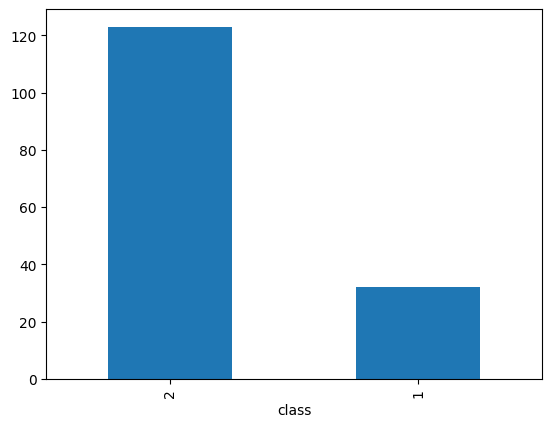

In [55]:
df['class'].value_counts().plot(kind='bar')

In [59]:
# Age Range
df.groupby(['age','sex']).size()

age  sex
7    1      1
20   1      2
     2      1
22   1      1
     2      1
23   1      4
24   1      2
25   1      2
     2      1
26   2      1
27   1      4
28   1      4
     2      1
30   1      7
     2      1
31   1      4
32   1      4
33   1      3
34   1      6
     2      2
35   1      2
36   1      7
37   1      5
38   1      8
39   1      6
40   1      3
41   1      2
     2      1
42   1      5
43   1      1
44   1      5
45   1      4
     2      1
46   1      1
47   1      4
48   1      2
49   1      3
50   1      5
     2      1
51   1      6
52   1      3
53   2      1
54   1      5
56   1      3
57   1      2
58   1      1
     2      1
59   1      1
60   1      1
61   1      3
62   1      1
     2      1
64   1      1
65   1      1
66   1      1
67   2      1
69   2      1
70   1      1
72   1      1
78   1      1
dtype: int64

##### Re-group Age Range using Frequency Distribution Table

In [63]:
df['age'].min() # Minimum age

7

In [64]:
df['age'].max() # Maximum/Oldest age 

78

In [ ]:
bins = np.linspace(min(df['age']), max(df['age']), 9)
bins

array([ 7.   , 15.875, 24.75 , 33.625, 42.5  , 51.375, 60.25 , 69.125,
       78.   ])

In [80]:
# re-group using Frequency Distribution for more information 
labels = ['less than 10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70 and above']
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
#bins = np.linspace(min(df['age']), max(df['age']), 9)
freq_dis = df.groupby(pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)).size()

In [81]:
freq_dis

age
less than 10     1
10-20            3
20-30           29
30-40           50
40-50           35
50-60           24
60-70           11
70 and above     2
dtype: int64

In [82]:
freq_dis.reset_index(name='count')

,age,count
0,less than 10,1
1,10-20,3
2,20-30,29
3,30-40,50
4,40-50,35
5,50-60,24
6,60-70,11
7,70 and above,2


In [ ]:
age_test = df[['age', 'sex', 'class']]
age_grp = age_test.groupby(['age', 'sex'], as_index=False).value_counts()
age_grp

,age,sex,class,count
0,7,1,2,1
1,20,1,2,2
2,20,2,2,1
3,22,1,2,1
4,22,2,2,1
...,...,...,...,...
75,67,2,2,1
76,69,2,2,1
77,70,1,1,1
78,72,1,2,1


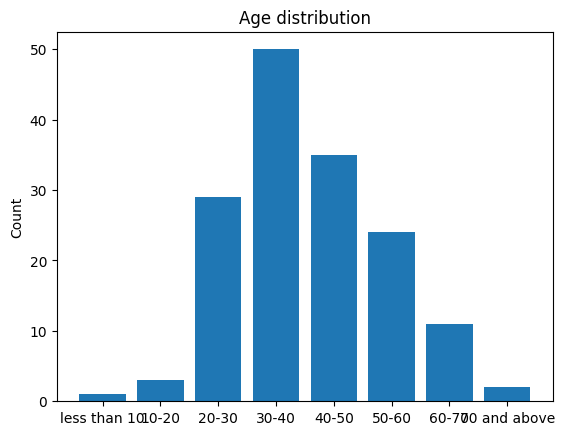

In [94]:
plt.bar(freq_dis['age'], freq_dis['count'])
plt.ylabel('Count')
plt.title('Age distribution')
plt.show()

#### OBSERVATION
+ The most infected with hepatitis is between the age 20 to 60 years
+ The highest prevalence of Hepatitis occurs between the age of 30 to 40 years

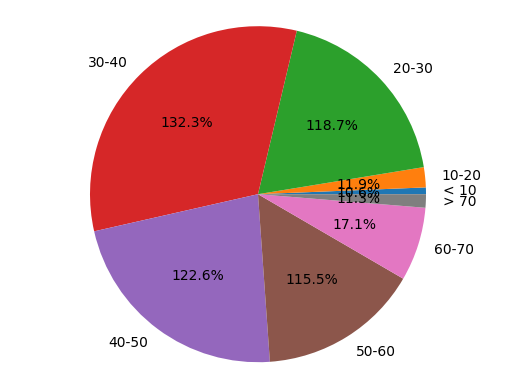

In [95]:
# Pie Chart Viz
labels = ['< 10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '> 70']
fig, ax1 = plt.subplots()
ax1.pie(freq_dis['count'], labels=labels, autopct='1%.1f%%')
ax1.axis('equal')
plt.show()

#### Detecting Outliers
+ Univariate Analysis
+ Multivariate Analyis

#### Methods
+ Boxplot 
+ Scatter 
+ Z-score 
+ Interquartile Range (IQR)

<Axes: >

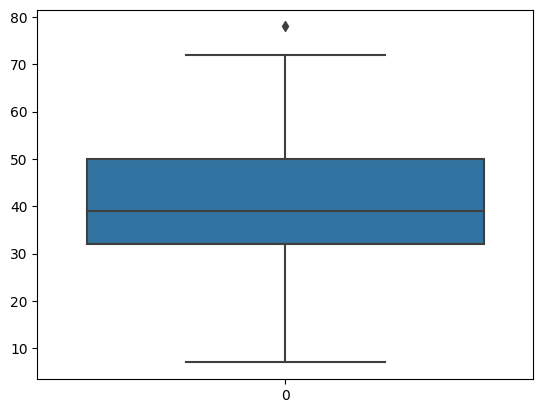

In [96]:
# Univariate outlier detection
sns.boxplot(df['age'])

+ 75 years above appears to be outlier

<Axes: >

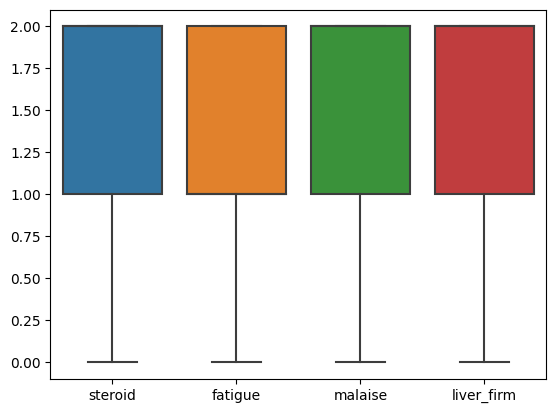

In [115]:
#Using sctterplot to detect outlier
sns.boxplot(df[['steroid', 'fatigue', 'malaise', 'liver_firm']])

<Axes: xlabel='albumin', ylabel='age'>

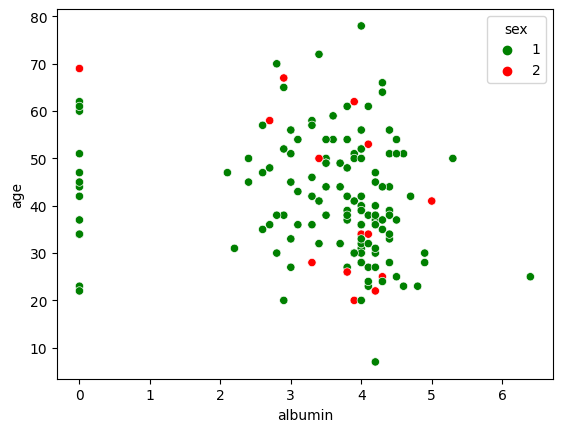

In [117]:
# Multivariate Outlier Detection
sns.scatterplot(x=df['albumin'], y=df['age'], hue=df['sex'], palette=['g', 'r'], data=df)

#### Let's find the outliers, in each column of the data, using IQR.

In [125]:
# To find the 25th percentile and 75th percentile.
Q1 = df.quantile(0.25) 
Q3 = df.quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)
IQR

class               0.00
age                18.00
sex                 0.00
steroid             1.00
antivirals          0.00
fatigue             1.00
malaise             1.00
anorexia            0.00
liver_big           0.00
liver_firm          1.00
spleen_palpable     0.00
spiders             1.00
ascites             0.00
varices             0.00
bilirubin           0.80
alk_phosphate      68.50
sgot               68.50
albumin             1.15
protime            65.00
histology           1.00
dtype: float64

In [141]:
# Finding lower and upper bounds for all actual values. All values outside these bounds are outliers
lower = Q1 - 1.5 * IQR
upper = Q3 - 1.5 * IQR
luo = (df < lower) | (df > upper)
#luo

+ After identifying outliers, we can decide whether to remove/treat them or not. It depends on one's approach, here we are not going to treat them as there will be outliers in real case scenario (in age, alk_phosphate, sgot, protime etc) and we would want our model to learn the underlying pattern for such customers.

**_To remove the outlier we can use the code below_**

`df_no_otl = df[~((df < lower) | (df > upper))]`

In [156]:
#df_no_otl = df[(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)) ]
df_no_otl = df[~((df < lower) | (df > upper)).any(axis=1)]
df_no_otl

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology


In [157]:
print(df.shape)
print(df_no_otl.shape)

(155, 20)
(0, 20)


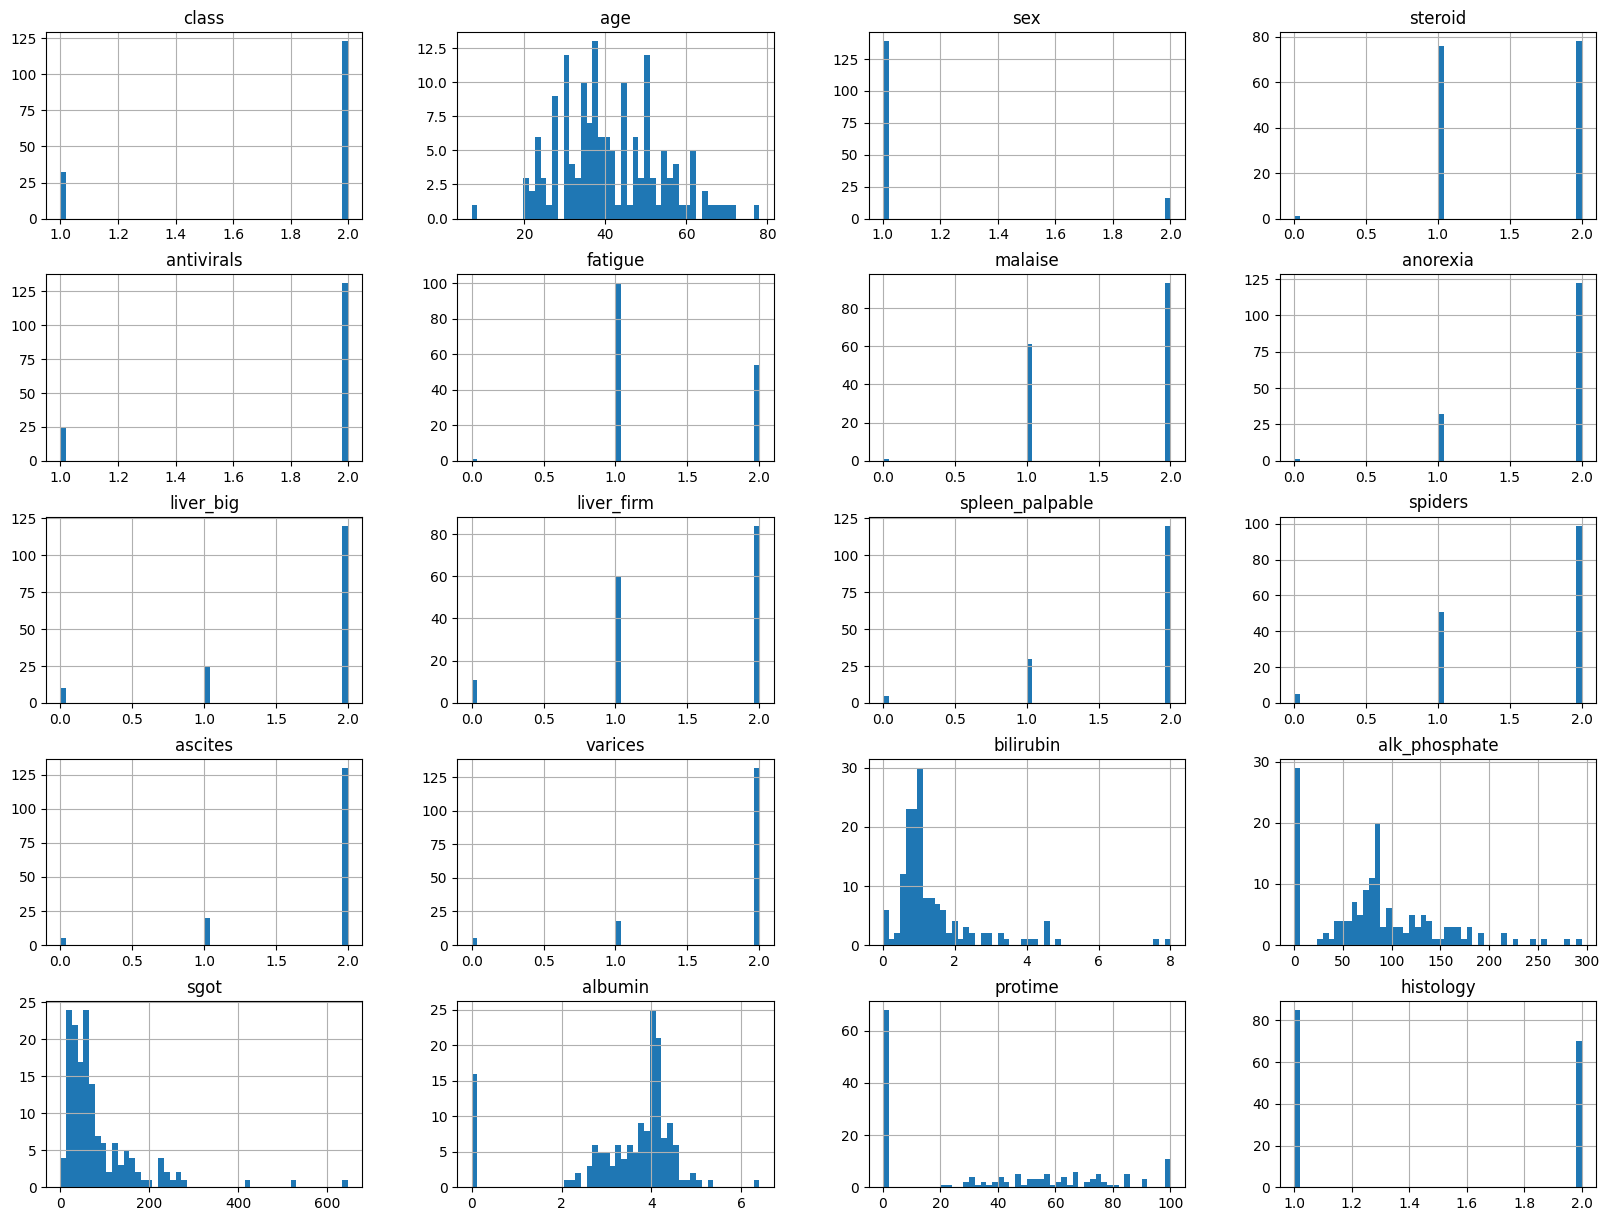

In [158]:
# Plot the distribution of data
df.hist(bins=50,figsize=(20,15))
plt.show()

# Feature Selection

#### Tools for selecting important features that corolate with the target/output

+ **SelectKbest**
> _SelectKbest:_ Help select features with strong relationships with the target
+ **Recursive Feature Elimination**
> _Recursive Feature Elimination:_ Help select features with strong relationships with the target and eliminate others

#### SelectKBest Method of Feature Selection

In [161]:
# import modules
from sklearn.feature_selection import SelectKBest, chi2

In [162]:
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1


In [163]:
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [169]:
# Features and Target
# Splitting our dataset into feature and target
xFeatures = df[['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology']]
yTarget = df['class']

In [197]:
# Selecting best features using SKb
skb = SelectKBest(score_func=chi2, k=15)
best_features = skb.fit(xFeature, yTarget)

In [198]:
# Highest score shows the best fureturs
print(f"Score: {best_features.scores_}")

Score: [ 28.47481919   0.38948319   0.3995129    0.18634161   2.34643234
   2.46803203   0.19648065   0.31698209   0.9867095    0.74535155
   3.18940804   2.09639954   1.12812176  30.10247172  17.88270548
  47.38820795   6.87318606 130.18332457   3.01854675]


In [199]:
# Transforing selected features(optional)
best_f_trans = best_features.transform(xFeatures)

In [200]:
best_f_trans

array([[30. ,  1. ,  2. , ...,  4. ,  0. ,  1. ],
       [50. ,  1. ,  1. , ...,  3.5,  0. ,  1. ],
       [78. ,  2. ,  1. , ...,  4. ,  0. ,  1. ],
       ...,
       [61. ,  1. ,  1. , ...,  4.1,  0. ,  2. ],
       [53. ,  1. ,  1. , ...,  4.1, 48. ,  2. ],
       [43. ,  2. ,  1. , ...,  3.1, 42. ,  2. ]])

#### Mapping Feature Scores to its respective name

In [201]:
# showing f_score in DataFrame

feature_score = pd.DataFrame(best_features.scores_, columns=['feature_score'])

In [202]:
feature_score

,feature_score
0,28.474819
1,0.389483
2,0.399513
3,0.186342
4,2.346432
5,2.468032
6,0.196481
7,0.316982
8,0.986710
9,0.745352


In [203]:
# Feature column name 
feature_column_name = pd.DataFrame(xFeatures.columns, columns=['feature_name'])

# Map Feature score to Feature name
best_feature_df = pd.concat([feature_column_name, feature_score], axis=1)

In [204]:
best_feature_df # The higher the score the better the feature for prediction

,feature_name,feature_score
0,age,28.474819
1,sex,0.389483
2,steroid,0.399513
3,antivirals,0.186342
4,fatigue,2.346432
5,malaise,2.468032
6,anorexia,0.196481
7,liver_big,0.316982
8,liver_firm,0.986710
9,spleen_palpable,0.745352


In [249]:
# Get the top best 12 features
best_feature_df.nlargest(19, 'feature_score')

,feature_name,feature_score
17,protime,130.183325
15,sgot,47.388208
13,bilirubin,30.102472
0,age,28.474819
14,alk_phosphate,17.882705
16,albumin,6.873186
10,spiders,3.189408
18,histology,3.018547
5,malaise,2.468032
4,fatigue,2.346432


#### Recursive Feature Elimination Method of Feature Selection

In [234]:
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LogisticRegression # A Classifier Algorithm 
from sklearn.tree import DecisionTreeClassifier

In [235]:
classifier = LogisticRegression(random_state=0)
estimator = DecisionTreeClassifier()

In [236]:
#rfe = RFE(classifier, n_features_to_select=8)
#rfcv = RFECV(classifier, cv=8)
selector = RFECV(estimator, cv=8)

In [239]:
#rfe.fit(xFeatures, yTarget)
select = selector.fit(xFeatures, yTarget)

In [241]:
# Selection
seelcted_features = pd.DataFrame(select.support_, columns=['Selected Features'])

In [243]:
feature_ranking = pd.DataFrame(select.ranking_, columns=['Features Ranking'])

In [247]:
show_selected = pd.concat([feature_column_name, seelcted_features, feature_ranking], axis=1)

In [248]:
show_selected 

,feature_name,Selected Features,Features Ranking
0,age,True,1
1,sex,False,7
2,steroid,False,6
3,antivirals,False,5
4,fatigue,False,4
5,malaise,True,1
6,anorexia,False,3
7,liver_big,False,2
8,liver_firm,True,1
9,spleen_palpable,True,1


### Narative
+ RFECV will eliminate the lowest ranking or true

#### ExtraTreesClassifier Method of Feature Selection

In [251]:
from sklearn.ensemble import ExtraTreesClassifier

In [252]:
etcf = ExtraTreesClassifier()
etcf.fit(xFeature, yTarget)

ExtraTreesClassifier()

In [254]:
 print(etcf.feature_importances_)

[0.06106794 0.02547162 0.02322226 0.01153512 0.02390339 0.05700971
 0.0266081  0.0399011  0.04899312 0.03970989 0.07875281 0.08722684
 0.05786558 0.08860607 0.06810862 0.05914621 0.0776725  0.06649388
 0.05870524]


In [257]:
feature_importance = pd.DataFrame(etcf.feature_importances_, columns=['Feature Importance'])
selected_feature_importance = pd.concat([feature_column_name, feature_importance], axis=1)

In [258]:
selected_feature_importance

,feature_name,Feature Importance
0,age,0.061068
1,sex,0.025472
2,steroid,0.023222
3,antivirals,0.011535
4,fatigue,0.023903
5,malaise,0.057010
6,anorexia,0.026608
7,liver_big,0.039901
8,liver_firm,0.048993
9,spleen_palpable,0.039710


In [261]:
selected_feature_importance.nlargest(12, 'Feature Importance')

,feature_name,Feature Importance
13,bilirubin,0.088606
11,ascites,0.087227
10,spiders,0.078753
16,albumin,0.077672
14,alk_phosphate,0.068109
17,protime,0.066494
0,age,0.061068
15,sgot,0.059146
18,histology,0.058705
12,varices,0.057866


<function matplotlib.pyplot.show(close=None, block=None)>

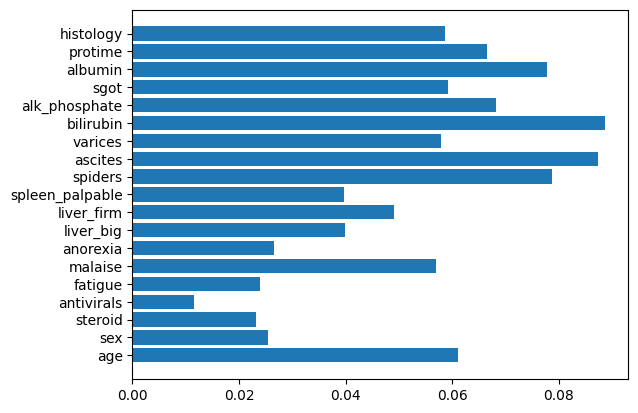

In [284]:
#figsize, ax1 = plt.subplots()
plt.barh(selected_feature_importance['feature_name'], selected_feature_importance['Feature Importance'])
plt.show

<Axes: ylabel='Feature Name'>

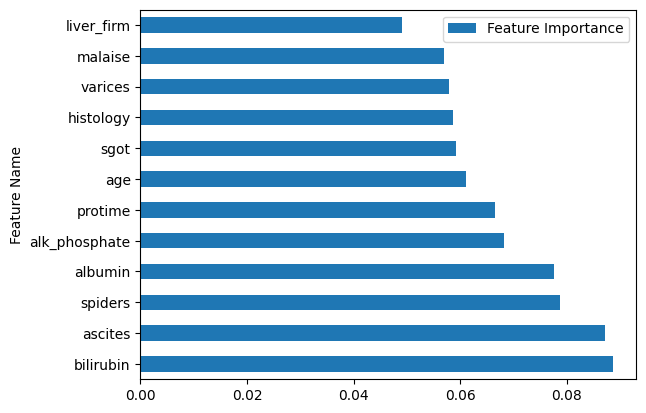

In [297]:
selected_feature_importance.nlargest(12, 'Feature Importance').plot(kind='barh', x='feature_name', ylabel='Feature Name')

In [298]:
selected_feature_importance.feature_name

0                 age
1                 sex
2             steroid
3          antivirals
4             fatigue
5             malaise
6            anorexia
7           liver_big
8          liver_firm
9     spleen_palpable
10            spiders
11            ascites
12            varices
13          bilirubin
14      alk_phosphate
15               sgot
16            albumin
17            protime
18          histology
Name: feature_name, dtype: object

#### Observation
+ The best selectd features for prediction include; **bilirubin, albumin, spider, age, protime, sgot, ascites, alk_phosphate, histology, malaise, varices, liver_firm and fatigue**.

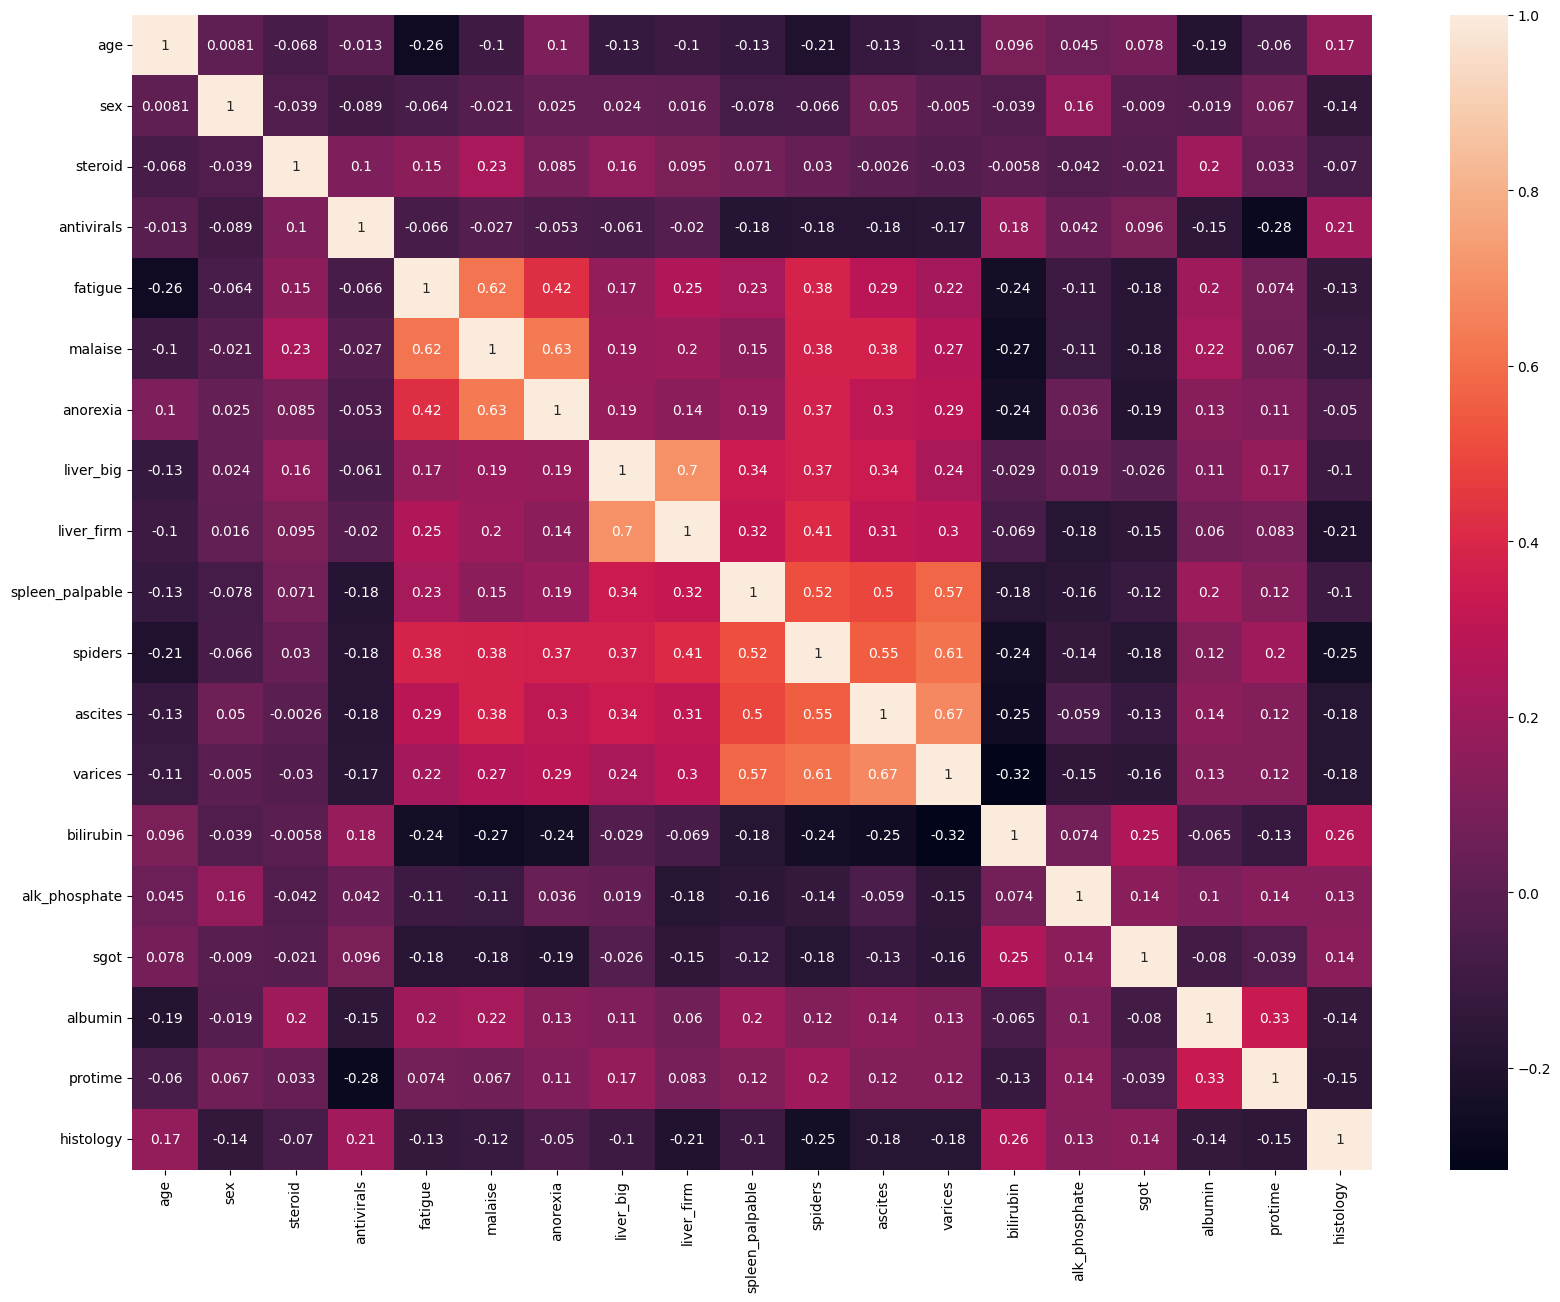

In [308]:
plt.figure(figsize=(20,15))
sns.heatmap(xFeatures.corr(), annot=True)
plt.show()

# Build Model

+ working with feature and target
+ Train, Test & Split data
+ Algorithm for model building we can use inlinde:
    - LogisticRegression
    - RandomForest
    - DecisionTreeClassifier
+ Serialize

In [309]:
# Importing ML modules
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Fearture/Target Splitting module
from sklearn.model_selection import train_test_split

# Evaluator
from sklearn.metrics import accuracy_score

In [314]:
# Initial Features
xFeatures.columns.tolist()

['age',
 'sex',
 'steroid',
 'antivirals',
 'fatigue',
 'malaise',
 'anorexia',
 'liver_big',
 'liver_firm',
 'spleen_palpable',
 'spiders',
 'ascites',
 'varices',
 'bilirubin',
 'alk_phosphate',
 'sgot',
 'albumin',
 'protime',
 'histology']

In [319]:
# Selected Featurs
best_feature_df.nlargest(12, 'feature_score')['feature_name'].tolist()

['protime',
 'sgot',
 'bilirubin',
 'age',
 'alk_phosphate',
 'albumin',
 'spiders',
 'histology',
 'malaise',
 'fatigue',
 'ascites',
 'varices']

#### Building model for both xFeatures & Selected Features
+ We compare accuracy of prediction on selected features as against all features

##### Starting with xFeatures

In [342]:
# xFeature
# Split Train Test Data of all features
X_train, X_test, y_train, y_test = train_test_split(xFeatures, yTarget, test_size=0.3, random_state=0 )

In [344]:
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train,y_train)

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [347]:
# Model Accuracy
# Method 1
logreg.score(X_test, y_test)

0.7659574468085106

In [346]:
# Method 2
pred = logreg.predict(X_test)

In [348]:
accuracy_score(y_test, pred)

0.7659574468085106

##### Selected Features

In [337]:
# Selected Features (steriod and antivirus been med/control were added to the selected feature )
selected_features = ['age','sex','steroid','antivirals','fatigue','malaise','liver_firm','spiders','ascites','varices','bilirubin','alk_phosphate','sgot','albumin','protime','histology']

In [338]:
X_best_features = xFeatures[selected_features]

In [341]:
# Split Train Test Data
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_best_features, yTarget, test_size=0.3, random_state=0 )

In [349]:
lg = LogisticRegression(random_state=0)
lg.fit(X_train_b,y_train_b)

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [350]:
# Check Accuracy
lg.score(X_test_b,y_test_b)

0.7872340425531915

In [351]:
pred_b = lg.predict(X_test_b)
accuracy_score(y_test_b, pred_b)

0.7872340425531915

#### Observations
+ The selected features perform better than all features

##### Making single prediction

In [356]:
X_test_b.iloc[1]

age               50.0
sex                2.0
steroid            1.0
antivirals         2.0
fatigue            1.0
malaise            2.0
liver_firm         1.0
spiders            1.0
ascites            2.0
varices            2.0
bilirubin          0.9
alk_phosphate    230.0
sgot             117.0
albumin            3.4
protime           41.0
histology          2.0
Name: 90, dtype: float64

In [357]:
# res_dic = {'Die':1,'Live':2}
x1 = X_test_b.iloc[1]
lg.predict(np.array(x1).reshape(1,-1)) # Reshape single feature to 2D

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2], dtype=int64)

#### Observations
+ GIven the single feature, the model predicted that the patient **Live**

## Building Model Using Decision Tree

In [359]:
dcf = DecisionTreeClassifier(random_state=0)
dcf.fit(X_train_b,y_train_b)

DecisionTreeClassifier(random_state=0)

In [365]:
# Model Accuracy Score
dcf.score(X_test_b,y_test_b)

0.7021276595744681

#### Observations
+ It appears DecisionTree model perform less when compare with LR


### Alternative Model with KNN

In [366]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier

In [382]:
knn = KNeighborsClassifier(n_neighbors=6)

In [383]:
knn.fit(X_train_b,y_train_b)

KNeighborsClassifier(n_neighbors=6)

In [384]:
knn.score(X_test_b,y_test_b)

0.7659574468085106

#### Observations
+ The first model holds better prediction in all the three algorithms used

#### Saving Model
##### The methods that can used to saving model are:
+ Serialization
+ Pickle
+ Joblib
+ Numpy / Json /Ray

In [385]:
# Using Jolib
import joblib

model_file = open("logisgic_reg_hep_model.pkl","wb")
joblib.dump(lg,model_file)
model_file.close()

In [386]:
model_file_dcf = open("decision_tree_hep_model.pkl","wb")
joblib.dump(dcf,model_file_dcf)
model_file_dcf.close()

In [387]:
model_file_knn = open("knn_hep_model.pkl","wb")
joblib.dump(knn,model_file_knn)
model_file_knn.close()

### Create Decision Tree Plot


In [399]:
from IPython.display import Image
from sklearn import tree
import pydotplus
import graphviz

In [391]:
feature_names = X_best_features.columns
target_names = ["Die", "Live"]

In [401]:
# Create A Dot Plot
dot_data = tree.export_graphviz(dcf,out_file=None,feature_names=feature_names,class_names=target_names)

In [402]:
graph = pydotplus.graph_from_dot_data(dot_data)

In [404]:
Image(graph.create_png())

InvocationException: GraphViz's executables not found